# Homework 2

### Caroline Nelson

#### Approach:
We are given a data set that consists of information about restaurants in New York City, and the goal of this homework is to use data frames and series from the pandas package to gain insight into this data.

##### Q1: Create a unique name for each restaurant.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
# import matplotlib
%pylab inline

df=pd.read_csv('NYC_Restaurants.csv',dtype=unicode)

#combine dba, building, street, and zipcode to create a 'RESTAURANT' column
df['RESTAURANT']=df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']
print df['RESTAURANT'].unique()[:10]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib
["WENDY'S 469 FLATBUSH AVENUE 11225"
 'TOV KOSHER KITCHEN 97-22 63 ROAD 11374'
 'BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD 11369'
 'MAY MAY KITCHEN 1269 SUTTER AVENUE 11208'
 'SEUDA FOODS 705 KINGS HIGHWAY 11223'
 'CARVEL ICE CREAM 203 CHURCH AVENUE 11218'
 'NORDIC DELICACIES 6909 3 AVENUE 11209'
 'GLORIOUS FOOD 522 EAST   74 STREET 10021'
 'THE MOVABLE FEAST 284 PROSPECT PARK WEST 11215'
 "BULLY'S DELI 759 BROADWAY 10003"]


##### Q2: How many restaurants are in the data set?

In order to figure out how many restaurants are in the data, we can drop the duplicates of the restaurant column, and find the length of that new series.

In [3]:
rest=df['RESTAURANT'].drop_duplicates()
#removes all duplicate restaurant names and addresses
print len(rest)

10114


##### Q3: How many chains?

For this question, we have to make sure we count accurately; first we drop duplicates of the restaurant set, like the first question.  This will give us a unique list of restaurants with their addresses.  A chain is defined by having the same restaurant (DBA) at more than one address.  The number of chains is the number of restaurants mapped to more than one DBA.

In [3]:
drop_rest=df.drop_duplicates(subset='RESTAURANT')
#drops duplicate restaurant names while maintaining the rest of the data set
mask=(drop_rest['DBA'].value_counts()>1)
#A chain would have a DBA listed more than once after duplicate restaurants are removed
chain=(drop_rest['DBA'].value_counts()[mask])
print len(chain)

368


##### Q4: Plot the top 20 chains.

We can take the series of chains we used in Q3, and simply plot.

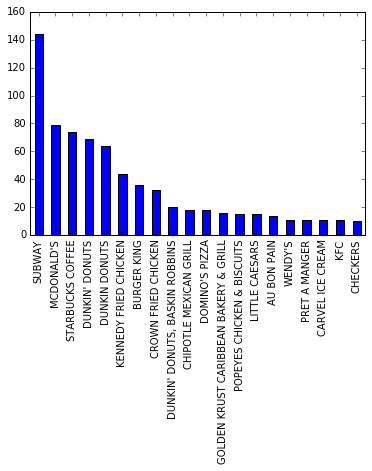

In [4]:
chain[:20].plot(kind='bar')

##### Q5: What percent of restaurants are chains?

To find the percent of restaurants that are chains, we take the sum of the counts list in Q3 to find the total number of chains, and divide that by the number of total restaurants, after dropping duplicates.

In [6]:
frac=float(sum(chain))/len(rest)
#sum(chain) counts total restaurants that are chains from previous question
print 'Number of chains:',sum(chain)
print 'Number of restaurants:',len(rest)
print 'Percent of restaurants that are chains:',frac*100,'%'

Number of chains: 1666
Number of restaurants: 10114
Percent of restaurants that are chains: 16.4722167293 %


##### Q6: Plot the number of non-chain restaurants in each borough.

To find the non-chains, we need the number of DBA's to be exactly one. Then, we have a list of non-chains, and can go through each DBA of the original data set and keep only those in the non-chains list.  Then, considering the 'Missing' borough, we can plot the number of non-chains per borough.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


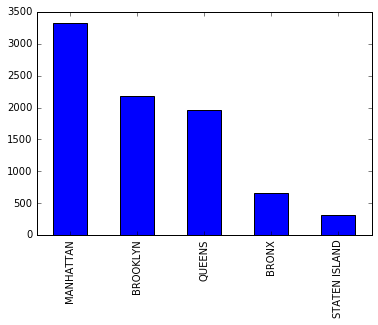

In [10]:
mask=(drop_rest['DBA'].value_counts()==1)
#since chains had a value count>1, we need the rest to find non-chains
#drop_rest is the data frame without duplicate restaurants in the restaurant column
non_chain=(drop_rest['DBA'].value_counts()[mask])

def check_in_nonchain(n):
     return n in non_chain
mask2=df['DBA'].map(check_in_nonchain)
#if a DBA is in the list of nonchains, we keep it
nonchain=df[mask2]
mask3=(df['BORO']!="Missing")
#We need to consider boroughs that are "Missing"'''
new_df=nonchain[['DBA','BORO']][mask3].drop_duplicates()['BORO'].value_counts()
new_df.plot(kind='bar')
#Now, looking at nonchains per borough, we count the number per borough and graph it.


##### Q7: Plot the fraction of non-chain restaurants in each borough.

Using the information from Q6, we can use series division to divide by the total number of restaurants in each borough. We can see in this graph that though Manhattan has the largest number of non-chain restaurants, Brooklyn has the highest ratio of non-chains to total number of restaurants.

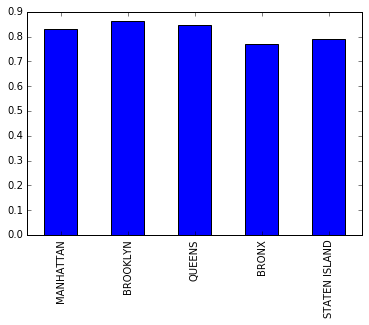

In [11]:
frac=(new_df)/df[['RESTAURANT','BORO']][mask3].drop_duplicates()['BORO'].value_counts()
#series division where mask3 takes away the 'missing' borough
frac.plot(kind='bar')

##### Q8: Popularity of cuisines

Popularity of cuisine is defined by the number of restaurants, or number of unique DBA's affiliated with that cuisine type.  We can drop duplicates of the DBA name, since each DBA is mapped to the same cuisine description despite location.

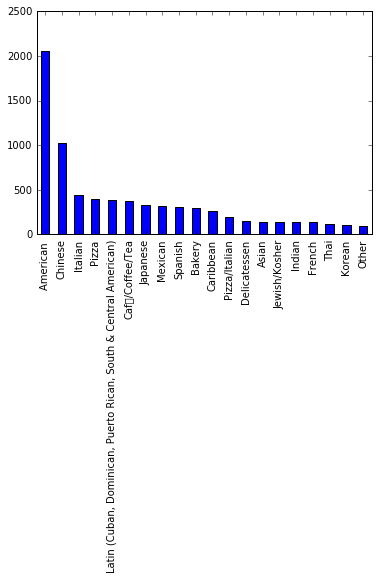

In [9]:
dropnames=df.drop_duplicates(subset='DBA')
#Since we are looking at specific restaurant names despite location, we can drop duplicates of DBA
dropnames['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

##### Q9: How many restaurants had no violations within each cuisine?

To solve this problem, we need to know which restaurants never got cited.  Since this data set also deals with inspections, there are restaurants who may be cited once, but then not cited the next time they are inspected.  Once we have these restaurants, we can graph each restaurant divided among the cuisine types.

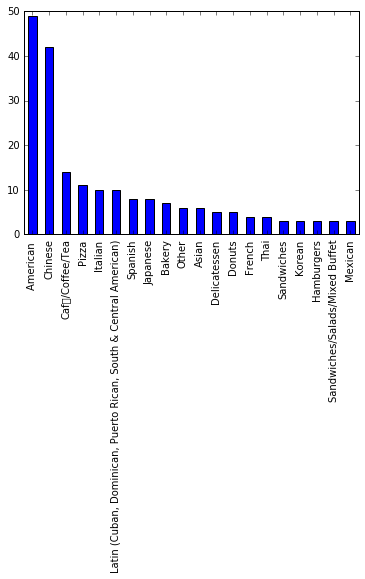

In [12]:
#creates a list of restaurants with a violation code
mask1=pd.notnull(df['VIOLATION CODE'])
rest_viol_cuis_notnull=df[['RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']][mask1]
rest_viol_cuis_notnull=rest_viol_cuis_notnull.drop_duplicates(subset='RESTAURANT')
not_null=rest_viol_cuis_notnull['RESTAURANT'].values
#create a list of restaurants without a violation code
mask2=pd.isnull(df['VIOLATION CODE'])
rest_viol_cuis_isnull=df[['RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']][mask2]
rest_viol_cuis_isnull=rest_viol_cuis_isnull.drop_duplicates(subset='RESTAURANT')
null=rest_viol_cuis_isnull['RESTAURANT'].values

no_vio_list=[]
#this list will have the final list of restaurants without a violation
for i in null:
    if i not in not_null:
        no_vio_list.append(i)
#this for loop takes every element in the null list, and looks to see if it is also in the not_null list
#if it isn't, then we keep it
mask3=rest_viol_cuis_isnull['RESTAURANT'].isin(no_vio_list)
final=rest_viol_cuis_isnull[mask3]

counts=final['CUISINE DESCRIPTION'].value_counts()
counts[:20].plot(kind='bar')


##### Q10: What cuisines tend to be the cleanest?

We first have to find the cuisines with 20 or more restaurants affiliated with it, and then use the null data frame we selected from the previous problem to find the proportion of the number of restaurants of each cuisine without citations compared to total number of restaurants per cuisine.

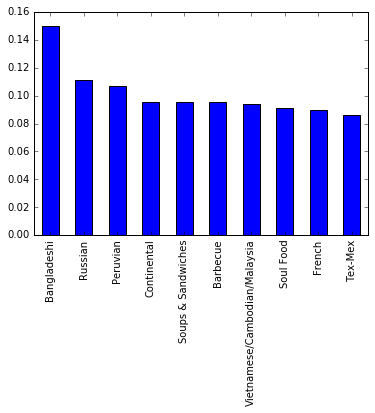

In [13]:
rest_cuis=drop_rest[['RESTAURANT','CUISINE DESCRIPTION']]
#small dataframe of the important variables, and dropping duplicate restaurant names
mask=(rest_cuis['CUISINE DESCRIPTION'].value_counts()>=20)
#We want at least 20 restaurants representing these cuisines
rest_cuis_counts=rest_cuis['CUISINE DESCRIPTION'].value_counts()[mask]
#Counts how many restaurants per cuisine

ratio=(rest_viol_cuis_isnull['CUISINE DESCRIPTION'].value_counts()/rest_cuis_counts)
#Series division with rest_viol_cuis_isnull from previous problem
ratio.sort_values(ascending=False)[:10].plot(kind='bar')
#We wanted the highest ratio, so we plot in descending order

##### Q11: What are the most common violations of each borough?

Now, we are looking at violations in each borough.  We can make a crosstab table that captures the number of times each validation code appears in each borough.

In [14]:
mask3=(df['BORO']!="Missing")
pivot=pd.crosstab(index=df['VIOLATION DESCRIPTION'][mask3],columns=df['BORO'])
#Creates a table of values of number of times each violation description occurs in each borough.
pivot


BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17
Ashtray present in smoke-free area.,4,4,5,8,1
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1


In [15]:
pivot.idxmax()
#gives most common violation per borough

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

##### Q12: What are the most common violations per borough, after normalizing for the relative abundance of each violation?
The previous question did not consider the frequency at which each violation is committed, so now we need to normalize for violation frequency.


In [16]:
q12_norm=pivot.copy()
#makes a copy of the previous pivot table

#The below calculations take the counts of each violation per borough, and divides them by the frequency of each violation overall.
q12_norm['violationFrequency']=q12_norm['BRONX']+q12_norm['MANHATTAN']+q12_norm['BROOKLYN']+q12_norm['QUEENS']+q12_norm['STATEN ISLAND']
q12_norm['MANHATTAN FREQ']=q12_norm['MANHATTAN']/q12_norm['violationFrequency']
q12_norm['BRONX FREQ']=q12_norm['BRONX']/q12_norm['violationFrequency']
q12_norm['BROOKLYN FREQ']=q12_norm['BROOKLYN']/q12_norm['violationFrequency']
q12_norm['QUEENS FREQ']=q12_norm['QUEENS']/q12_norm['violationFrequency']
q12_norm['STATEN ISLAND FREQ']=q12_norm['STATEN ISLAND']/q12_norm['violationFrequency']

q12_norm=q12_norm[['MANHATTAN FREQ','BRONX FREQ','BROOKLYN FREQ','QUEENS FREQ','STATEN ISLAND FREQ']]
q12_norm[:10]


BORO,MANHATTAN FREQ,BRONX FREQ,BROOKLYN FREQ,QUEENS FREQ,STATEN ISLAND FREQ
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",0.362963,0.088889,0.296296,0.214815,0.037037
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,0.352941,0.058824,0.294118,0.235294,0.058824
''''Wash hands sign not posted at hand wash facility.,0.389121,0.087866,0.238494,0.251046,0.033473
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",0.301587,0.079365,0.190476,0.380952,0.047619
Accurate thermometer not provided in refrigerated or hot holding equipment.,0.323432,0.069307,0.250825,0.303630,0.052805
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",0.394161,0.065693,0.291971,0.206813,0.041363
Ashtray present in smoke-free area.,0.227273,0.181818,0.181818,0.363636,0.045455
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",0.452830,0.053908,0.250674,0.215633,0.026954
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0.375000,0.000000,0.250000,0.312500,0.062500


In [17]:
q12_norm.idxmax()
#Despite what the previous problem said, these are the most common violations in each borough.

BORO
MANHATTAN FREQ        Out-of package sale of tobacco products observed.
BRONX FREQ                                  Unprotected food re-served.
BROOKLYN FREQ         Precooked potentially hazardous food from comm...
QUEENS FREQ           Caloric content range (minimum to maximum) not...
STATEN ISLAND FREQ    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

##### Q13: Find the number of area codes associated with one zipcode.

In order to solve this problem, we have to first extract the area code from each phone number.  Then, we can create a pivot table that tells us at which zipcode each area code occurs how many times.  We can find the area codes that are only mentioned once in the table, and count how many there are. 

In [18]:
def get_firstthree(s):
    return s[0:3]
drop_rest['areacode']=drop_rest['PHONE'].map(get_firstthree)
#gets first three digits from each phone number
areacode_zip=drop_rest[['areacode','ZIPCODE']].copy()
areacode_zip['COUNT']=1
#this column is used to create a pivot table
#each area code and zip code combination occurs at least once
areacode_zip=areacode_zip.drop_duplicates()

pivot13=pd.pivot_table(areacode_zip,index='areacode',columns='ZIPCODE',values='COUNT',aggfunc=sum,fill_value=0,margins=True)
print pivot13[:10]
pivot13=pivot13[['All']]
#We want the total count of each area code across the zip codes
print len(pivot13[pivot13.All==1])
#34

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


ZIPCODE   10001  10002  10003  10004  10005  10006  10007  10009  10010  \
areacode                                                                  
0           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
171         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
175         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
191         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
201         1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
202         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
206         0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
212         1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
215         0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
270         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ZIPCODE   10011  ...   11434  11435  11436  11691  11692  11693  11694  11697  \
areacode         .

##### Q14: Find common misspellings of street names.

First, we create 'Street type' and 'Street base' columns.

In [19]:
#create 'Street type' and 'Street base' columns
def street_type(s):
    names=s.split()
    if len(names[-1])==1:
        return 'NULL'
    else:
        return names[-1].upper()
def street_base(s):
    base=s.split()
    return (' ').join(base[0:-1])

df['STREET TYPE']=df['STREET'].map(street_type)
df['STREET BASE']=df['STREET'].map(street_base)


Then, we can create the 'Street base & zip' column, and create a data frame with the three new columns. Accounting for the missing base values, we merge the dataframe on itself (had some trouble with this computer producing output with the merge function).  Then we can find where the street types are different for the same street base & zip, and create a table of only different street types to find the most common substitute.

In [ ]:
df['STREET BASE & ZIP']=df['STREET BASE']+' '+df['ZIPCODE']
df['STREET BASE & ZIP']=df['STREET BASE & ZIP'].drop_duplicates()
orig=df[['STREET BASE & ZIP','STREET BASE','STREET TYPE']]
mask=(orig['STREET BASE']!='')
#this mask removes empty base rows
orig=orig[mask]

#merge the table with itself
merged=pd.merge(orig,orig,on='STREET BASE & ZIP')

#mask the different forms of the same street type
mask=(merged['STREET TYPE_x']!=merged['STREET TYPE_y'])
merged2=merged[mask]

#creates a table that matches up street types and the number of each combination
table=pd.crosstab(merged2['STREET TYPE_x'],merged2['STREET TYPE_y'])
table[:10]


In [ ]:
print 'AVE most commonly went with:',table['AVE'].idxmax()
print 'ST most commonly went with: ',table['ST'].idxmax()
print 'RD most commonly went with: ',table['RD'].idxmax()
print 'PL most commonly went with: ',table['PL'].idxmax()
print 'BOULEARD most commonly went with: ',table['BOULEARD'].idxmax()
print 'BULEVARD most commonly went with: ',table['BULEVARD'].idxmax()